In [1]:
import pandas as pd

data = pd.read_csv("turkiye-student-evaluation_generic.csv")
data = data.applymap(float)

# Taking the questions
dataset_question = data.iloc[:,5:33]

dataset_question

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5816,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0
5817,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5818,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
# Reduction of dimensions with PCA and K-Means

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
embedded_data = pca.fit_transform(dataset_question)

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(embedded_data)

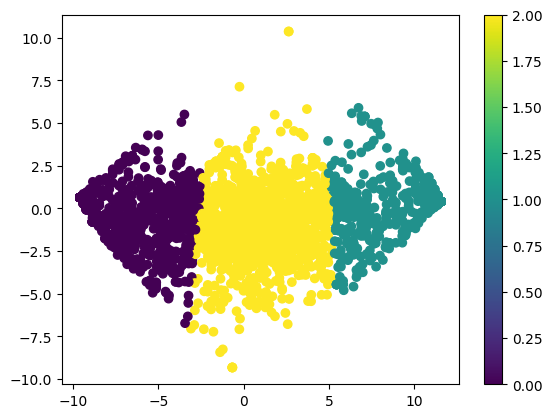

In [8]:
# K-Means Plot

import matplotlib.pyplot as plt

cluster_labels = kmeans.labels_
fig, ax = plt.subplots()
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=cluster_labels)
plt.colorbar()
plt.show()

In [9]:
# Tokenizing data for word2vec
# Sentences formed using average of the scores, id's that has the same averages goes to the same sentence

import nltk
from random import shuffle

tokenized_data = []

data['avg'] = dataset_question.mean(axis=1)
data['id'] = range(1, len(data) + 1)
unique_values = data['avg'].unique()

for i in unique_values:
    a = " ".join(data.loc[data['avg'] == i, 'id'].astype(str).values.tolist())
    
    split = a.split()    # Split the string into a list of words
    shuffle(split)       # This shuffles the list in-place.
    a = ' '.join(split)  # Turn the list back into a string

    tokenized_data.append(nltk.word_tokenize(a))


In [10]:
# Word2vec model

from gensim.models import Word2Vec

# training the W2V model
model = Word2Vec(sentences=tokenized_data, 
                 window=20,  
                 workers=4,
                 min_count=1)

In [11]:
# TSNE graph of Word2vec

from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model):
    num_components = 2 # number of dimensions to keep after compression
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word)
    # apply TSNE
    tsne = TSNE(n_components=num_components, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_embeddings(x_vals, y_vals, labels):
    import plotly.graph_objs as go
    fig = go.Figure()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', text=labels)
    fig.add_trace(trace)
    fig.update_layout(title="Word2Vec - TSNE")
    fig.show()
    return fig

x_vals, y_vals, labels = reduce_dimensions(model)
plot = plot_embeddings(x_vals, y_vals, labels)

c:\Users\Ferhat\anaconda3\envs\tez\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Ferhat\anaconda3\envs\tez\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


c:\Users\Ferhat\anaconda3\envs\tez\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



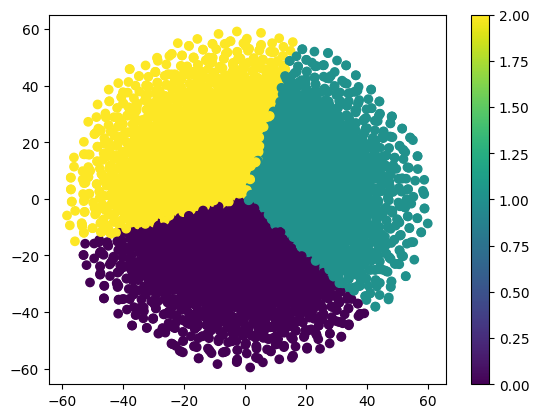

In [12]:
# Reduction of dimensions with TSNE and K-Means plotting for word2vec output

def run_tsne(data, num_dimensions=2, perplexity=30.0, learning_rate=200.0, num_iterations=1000):
    # Create t-SNE object
    tsne = TSNE(n_components=num_dimensions, perplexity=perplexity, learning_rate=learning_rate, n_iter=num_iterations)
    
    # Run t-SNE on the data
    embedded_data = tsne.fit_transform(data)
    
    return embedded_data

embedded_data = run_tsne(model.wv.vectors)

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(embedded_data)

cluster_labels = kmeans.labels_
fig, ax = plt.subplots()
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=cluster_labels)
plt.colorbar()
plt.show()